In [43]:
import tensorflow as tf
import numpy as np
rng = np.random

import matplotlib.pyplot as plt
learning_rate = 0.0001
training_epochs = 1000
display_step = 50


In [44]:
with tf.name_scope("Creation_of_array"):
    trX=np.asarray([1.11,0.67,-2.24,-3.31,5.45,4.0,4.8,3.32,0.78,-2.33])
    trY=np.asarray([-0.07,2.75,4.51,3.07,-6.46,1.22,0.34,-9.98,0.001,2.25])
    x = tf.constant(trX,dtype = tf.float32,name = "x_array")
    y = tf.constant(trY,dtype = tf.float32, name= "y_array")
with tf.name_scope("Calculating_y_mean"):
    mean_y = tf.reduce_mean(y, name = "mean_y")
    with tf.Session() as sess:
        result_y = sess.run(mean_y)
        print(result_y)

-0.2369


In [45]:
with tf.name_scope("Calculating_x_mean_and_x_variance"):
    mean_x, variance = tf.nn.moments(x, [0], name = "mean_x_and_variance_x")
    with tf.Session() as sess:
        m, v = sess.run([mean_x, variance])
        print(m)
        print(v)


1.225
8.84507


In [46]:
with tf.name_scope("Calculating_covariance"):
    def tensorflow_covariance(trX,trY,x_mean,y_mean):
        cov = 0.0
        for i in range(0,10):
            x_val = tf.subtract(trX[i],x_mean, name="Finding_difference_of_xval_and_mean")
            y_val = tf.subtract(trY[i],y_mean, name="Finding_difference_of_yval_and_mean")
            total_val = tf.multiply(x_val,y_val, name="Multiplying_found_values")
            cov = tf.add(cov,total_val, name="Recursive_addition")
        return cov/10.0
    with tf.Session() as sess:
        covar = sess.run(tensorflow_covariance(x,y,m,result_y))
        print(covar)

-8.26676


In [47]:
with tf.name_scope("Calculating_slope_m_and_c"):
    slope = tf.div(covar,v,name="Finding_slope")
    intm = tf.multiply(slope,m,name = "Intermediate_step")
    c_intm = tf.subtract(result_y,intm,name = "Finding_c")

    with tf.Session() as sess:
        m_slope = sess.run(slope)
        c = sess.run(c_intm)
        print(m_slope)
        print(c)

-0.934618
0.908008


('Epoch:', '0050', 'cost=', '11.697553635', 'M=', -0.6362133, 'C=', 0.20265795)
('Epoch:', '0100', 'cost=', '11.307593346', 'M=', -0.6362133, 'C=', 0.20265795)
('Epoch:', '0150', 'cost=', '10.954498291', 'M=', -0.6362133, 'C=', 0.20265795)
('Epoch:', '0200', 'cost=', '10.634613991', 'M=', -0.6362133, 'C=', 0.20265795)
('Epoch:', '0250', 'cost=', '10.344644547', 'M=', -0.6362133, 'C=', 0.20265795)
('Epoch:', '0300', 'cost=', '10.081624031', 'M=', -0.6362133, 'C=', 0.20265795)
('Epoch:', '0350', 'cost=', '9.842879295', 'M=', -0.6362133, 'C=', 0.20265795)
('Epoch:', '0400', 'cost=', '9.626007080', 'M=', -0.6362133, 'C=', 0.20265795)
('Epoch:', '0450', 'cost=', '9.428844452', 'M=', -0.6362133, 'C=', 0.20265795)
('Epoch:', '0500', 'cost=', '9.249438286', 'M=', -0.6362133, 'C=', 0.20265795)
('Epoch:', '0550', 'cost=', '9.086039543', 'M=', -0.6362133, 'C=', 0.20265795)
('Epoch:', '0600', 'cost=', '8.937064171', 'M=', -0.6362133, 'C=', 0.20265795)
('Epoch:', '0650', 'cost=', '8.801090240', 'M=

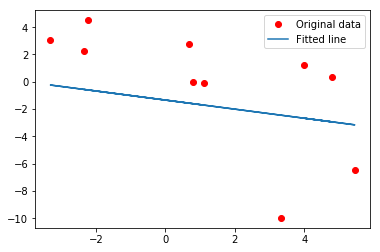

In [49]:
with tf.name_scope("Plotting"):
    n_samples = trX.shape[0]
    X = tf.placeholder("float")
    Y = tf.placeholder("float")

    # Set model weights
    M = tf.Variable(rng.randn(), name="weight")
    C = tf.Variable(rng.randn(), name="bias")

    # Construct a linear model
    pred = tf.add(tf.multiply(X, M), C)


    # Mean squared error
    cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
    # Gradient descent
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

    # Initializing the variables
    init = tf.global_variables_initializer()

    # Launch the graph
    with tf.Session() as sess:
        sess.run(init)

        # Fit all training data
        for epoch in range(training_epochs):
            for (p, r) in zip(trX, trY):
                sess.run(optimizer, feed_dict={X: p, Y: r})

            # Display logs per epoch step
            if (epoch+1) % display_step == 0:
                c = sess.run(cost, feed_dict={X: trX, Y:trY})
                print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                    "M=", sess.run(W), "C=", sess.run(b))

        print("Optimization Finished!")
        training_cost = sess.run(cost, feed_dict={X: trX, Y: trY})
        print("Training cost=", training_cost, "M=", sess.run(M), "C=", sess.run(C), '\n')

        # Graphic display
        plt.plot(trX, trY, 'ro', label='Original data')
        plt.plot(trX, sess.run(M) * trX + sess.run(C), label='Fitted line')
        plt.legend()
        plt.show()

In [50]:
with tf.name_scope("Finding_root_mean_square_error"):
    rms = tf.sqrt(tf.reduce_mean(tf.squared_difference(trX, trY,name = "Finding_squared_difference"),name="Finding_mean"),name = "Finding_square_root")
    with tf.Session() as sess:
        rmse=sess.run(rms)
        print(rmse)

6.78179210091


$$\theta_1(t+1) = \theta_1(t) - learning\_rate * cost(t) * x(t)$$

In [51]:
with tf.name_scope("Finding_theta_1"): 
    y_var = tf.subtract(y,result_y,name = "Subtract_array_y_with_y_mean")
    x_var = tf.subtract(x,m,name = "Subtract_array_x_with_x_mean")
    mult = tf.multiply(x_var,y_var,name = "Multiply_calculated_arrays")
    sumn = tf.reduce_sum(mult,name = "Find_sum_of_x_i_minus_mean_x_and_y_i_minus_mean_y")
    x_var2 = tf.multiply(x_var,x_var,name = "Squaring_found_arrray_values")
    sumd = tf.reduce_sum(x_var2,name = "Find_sum_of_array_of_x_i_minus_mean_x")
    val = sumn/sumd

    with tf.Session() as sess:
        res = sess.run(val)
        print(res)

-0.934618


In [52]:
with tf.name_scope("Finding_theta_0"):    
    temp = tf.multiply(res,m,name = "Multiply_res_with_slope")
    theta = tf.subtract(result_y,temp,name="Sub_obtained_res_with_mean_y")
    with tf.Session() as sess:
        theta0 = sess.run(theta)
        print(theta0)

0.908007
